### Solutions

#### 1i.) We are working with a logit (logistic regression) model where the probability of an event yi occurring depends on the explanatory variables xi and a vector of coefficients β. The probability distribution function (pdf) of yi is given by:

$$
f(y_i; \mathbf{\beta}) = \mu_i^{y_i} (1 - \mu_i)^{1 - y_i}
$$

#### where yi ∈{0,1}, and 𝜇i is the predicted probability of event yi = 1, given by the logistic function:

$$
\mu_i = \frac{1}{1 + \exp(-\mathbf{x}_i^\prime \mathbf{\beta})}
$$

#### The log-likelihood function is the sum of the log-probabilities for all n observations. Since yi ∈{0,1}, we use the Bernoulli likelihood for each observation.

#### The likelihood function for each yi is:

$$
L_i = \mu_i^{y_i} (1 - \mu_i)^{1 - y_i}
$$

#### Taking the natural logarithm of this expression to get the log-likelihood:

$$
\log L_i = y_i \log(\mu_i) + (1 - y_i) \log(1 - \mu_i)
$$

#### Substitute 
$$ \mu_i = \frac{1}{1 + \exp(-\mathbf{x}_i^\prime \mathbf{\beta})} 
$$
#### We get;
$$
\log L_i = y_i \log\left( \frac{1}{1 + \exp(-\mathbf{x}_i^\prime \mathbf{\beta})} \right) + (1 - y_i) \log\left( \frac{\exp(-\mathbf{x}_i^\prime \mathbf{\beta})}{1 + \exp(-\mathbf{x}_i^\prime \mathbf{\beta})} \right)
$$


#### Simplifying:

$$
\log L_i = y_i \left( -\log(1 + \exp(-\mathbf{x}_i^\prime \mathbf{\beta})) \right) + (1 - y_i) \left( -\mathbf{x}_i^\prime \mathbf{\beta} - \log(1 + \exp(-\mathbf{x}_i^\prime \mathbf{\beta})) \right)
$$

##### The total log-likelihood over all observations is the sum of individual log-likelihoods:

$$
\mathcal{L}(\mathbf{\beta}) = \sum_{i=1}^n \log L_i
$$

#### Simplifying the log-likelihood function:

$$
\mathcal{L}(\mathbf{\beta}) = \sum_{i=1}^n \left[ y_i (\mathbf{x}_i^\prime \mathbf{\beta}) - \log(1 + \exp(\mathbf{x}_i^\prime \mathbf{\beta})) \right]
$$


#### Gradient of the Log-Likelihood:

#### The gradient is the vector of partial derivatives of the log-likelihood with respect to each coefficient in β. Let's differentiate the log-likelihood with respect to β.

#### Taking the derivative of the log-likelihood:

$$
\frac{\partial \mathcal{L}(\mathbf{\beta})}{\partial \mathbf{\beta}} = \sum_{i=1}^n \left[ y_i \mathbf{x}_i - \frac{\exp(\mathbf{x}_i^\prime \mathbf{\beta})}{1 + \exp(\mathbf{x}_i^\prime \mathbf{\beta})} \mathbf{x}_i \right]
$$

#### Using 
$$ \mu_i = \frac{1}{1 + \exp(-\mathbf{x}_i^\prime \mathbf{\beta})} $$
#### this simplifies to:

$$
\frac{\partial \mathcal{L}(\mathbf{\beta})}{\partial \mathbf{\beta}} = \sum_{i=1}^n \mathbf{x}_i \left( y_i - \mu_i \right)
$$

#### This is the gradient of the log-likelihood.

#### Hessian of the Log-Likelihood:

#### The Hessian matrix is the matrix of second-order partial derivatives of the log-likelihood function with respect to the coefficients β.

#### To compute the Hessian, we take the derivative of the gradient with respect to β:

$$
H(\beta) = \frac{\partial^2 \log L(\beta)}{\partial \beta \partial \beta'}
$$

#### Thus the Hessian for logistic regression is given by:
$$
H(\beta) = - \sum_{i=1}^{n} \mu_i (1 - \mu_i) \mathbf{x}_i \mathbf{x}_i'
$$



#### This is a negative definite matrix, which ensures that the log-likelihood function is concave, and thus we can use it for optimization (e.g., Newton-Raphson).


<brb>

#### 1ii.) Using Python, write a class to represent the Logit model.


In [2]:
import numpy as np
from scipy.optimize import minimize

class LogitModel:
    def __init__(self, X, y):
        """
        Initialize the Logit model with feature matrix X and target vector y.
        X: Feature matrix of shape (n_samples, n_features)
        y: Target vector of shape (n_samples,)
        """
        self.X = np.array(X)
        self.y = np.array(y)
        self.n_samples, self.n_features = self.X.shape
        self.beta = np.zeros(self.n_features)  # Initial coefficients set to zero
    
    def sigmoid(self, z):
        """
        Sigmoid (logistic) function.
        z: Input array of shape (n_samples,)
        Returns: Array of sigmoid values.
        """
        return 1 / (1 + np.exp(-z))

    def log_likelihood(self, beta):
        """
        Calculate the log-likelihood function for the Logit model.
        beta: Coefficient vector of shape (n_features,)
        Returns: The log-likelihood value (scalar).
        """
        X_beta = np.dot(self.X, beta)
        mu = self.sigmoid(X_beta)
        # Log-likelihood function
        ll = np.sum(self.y * np.log(mu) + (1 - self.y) * np.log(1 - mu))
        return ll
    
    def gradient(self, beta):
        """
        Compute the gradient of the log-likelihood function.
        beta: Coefficient vector of shape (n_features,)
        Returns: Gradient vector of shape (n_features,).
        """
        X_beta = np.dot(self.X, beta)
        mu = self.sigmoid(X_beta)
        # Gradient is the derivative of log-likelihood with respect to beta
        grad = np.dot(self.X.T, self.y - mu)
        return grad
    
    def hessian(self, beta):
        """
        Compute the Hessian matrix of the log-likelihood function.
        beta: Coefficient vector of shape (n_features,)
        Returns: Hessian matrix of shape (n_features, n_features).
        """
        X_beta = np.dot(self.X, beta)
        mu = self.sigmoid(X_beta)
        W = np.diag(mu * (1 - mu))  # Weight matrix
        # Hessian is X'WX
        hess = np.dot(np.dot(self.X.T, W), self.X)
        return hess
    
    def fit(self):
        """
        Fit the Logit model using maximum likelihood estimation.
        Uses scipy.optimize.minimize to maximize the log-likelihood.
        """
        result = minimize(fun=lambda beta: -self.log_likelihood(beta),  # Minimizing negative log-likelihood
                          x0=self.beta,  # Initial guess for beta
                          jac=lambda beta: -self.gradient(beta),  # Gradient for optimization
                          method='BFGS',  # Quasi-Newton method
                          options={'disp': True})
        self.beta = result.x
        return self.beta

    def predict_proba(self, X_new):
        """
        Predict probabilities for new data points.
        X_new: New feature matrix of shape (n_samples_new, n_features)
        Returns: Probabilities of shape (n_samples_new,)
        """
        X_new = np.array(X_new)                   # Ensure X_new is a NumPy array
        return self.sigmoid(np.dot(X_new, self.beta))   # Apply sigmoid to linear predictor
    
    def predict(self, X_new, threshold=0.5):
        """
        Predict class labels (0 or 1) for new data points based on a threshold.
        X_new: New feature matrix of shape (n_samples_new, n_features)
        threshold: Threshold for classifying probabilities into 0 or 1.
        Returns: Predicted class labels of shape (n_samples_new,)
        """
        probas = self.predict_proba(X_new)        # Get predicted probabilities
        return (probas >= threshold).astype(int)   # Classify based on threshold


##### The logit model class above implements logistic regression for binary classification. It estimates model coefficients using maximum likelihood estimation and optimizes them through the Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm. It includes methods for computing the log-likelihood, gradient, and Hessian, and it can predict probabilities or binary outcomes for new data using a sigmoid function.

<brb>

#### 1iii.) Use the following dataset and initial values of 𝜷 to estimate the MLE with the Newton-Raphson algorithm developed in class:

In [3]:
import numpy as np
# the logit model as defined above
class LogitModel:
    def __init__(self, X, y, beta):
        self.X = X
        self.y = y
        self.beta = beta
        self.n_samples, self.n_features = X.shape

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def logL(self):
        mu = self.sigmoid(np.dot(self.X, self.beta))
        return np.sum(self.y * np.log(mu) + (1 - self.y) * np.log(1 - mu))

    def G(self):
        mu = self.sigmoid(np.dot(self.X, self.beta))
        return np.dot(self.X.T, self.y - mu)

    def H(self):
        mu = self.sigmoid(np.dot(self.X, self.beta))
        W = np.diag(mu * (1 - mu))  # Diagonal weight matrix
        return -np.dot(np.dot(self.X.T, W), self.X)
#the newton_raphson
def newton_raphson(model, tol=1e-4, max_iter=1000, display=True):
    i = 0
    error = 100  # Initial error value

    # Print header of output
    if display:
        header = f'{"Iteration_k":<13}{"Log-likelihood":<16}{"θ":<60}'
        print(header)
        print("-" * len(header))

    # While loop runs while any value in error is greater than the tolerance
    while np.any(error > tol) and i < max_iter:
        H, G = model.H(), model.G()
        beta_new = model.beta - (np.linalg.inv(H) @ G)
        error = np.abs(beta_new - model.beta)
        model.beta = beta_new

        # Print iterations
        if display:
            beta_list = [f'{t:.3}' for t in list(model.beta.flatten())]
            update = f'{i:<13}{model.logL():<16.8}{beta_list}'
            print(update)

        i += 1

    print(f'Number of iterations: {i}')
    print(f'β_hat = {model.beta.flatten()}')

    return model.beta.flatten()

# Dataset
X = np.array([[1, 2, 4],
              [1, 1, 1],
              [1, 4, 3],
              [1, 5, 6],
              [1, 3, 5]])

y = np.array([1, 0, 1, 1, 0])

# Initial beta values
beta_0 = np.array([0.1, 0.1, 0.1])

# Create the model
model = LogitModel(X, y, beta_0)

# Perform Newton-Raphson optimization
beta_hat = newton_raphson(model)

Iteration_k  Log-likelihood  θ                                                           
-----------------------------------------------------------------------------------------
0            -2.4304503      ['-2.11', '1.07', '-0.161']
1            -2.4091638      ['-2.39', '1.2', '-0.153']
2            -2.408845       ['-2.42', '1.23', '-0.158']
3            -2.4088448      ['-2.43', '1.23', '-0.158']
4            -2.4088448      ['-2.43', '1.23', '-0.158']
Number of iterations: 5
β_hat = [-2.4250679   1.22951194 -0.15811793]


Optimization terminated successfully.
         Current function value: 0.481769
         Iterations 6

Estimated coefficients using statsmodels:
[-2.4250679   1.22951194 -0.15811793]


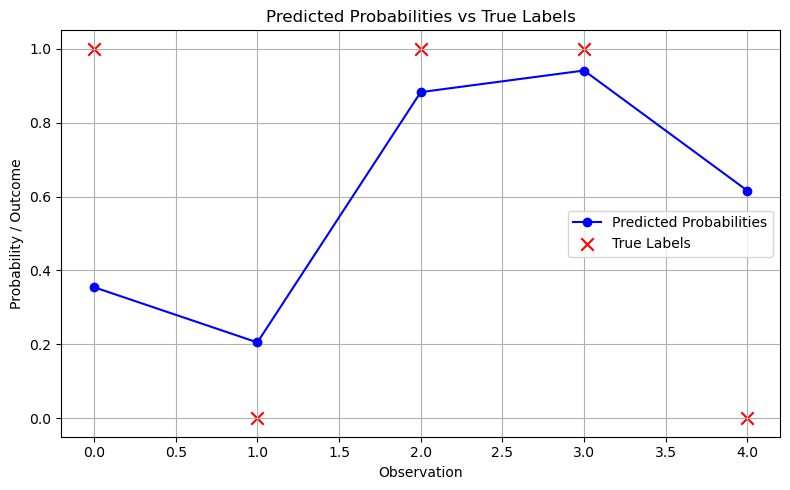

In [4]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Dataset (same as before)
X = np.array([[1, 2, 4],
              [1, 1, 1],
              [1, 4, 3],
              [1, 5, 6],
              [1, 3, 5]])

y = np.array([1, 0, 1, 1, 0])

# Using statsmodels to fit the Logit model
# Add an intercept term (bias term) to the dataset
logit_model = sm.Logit(y, X)

# Fit the model and obtain the result
result = logit_model.fit()

# Print the estimated coefficients (MLE)
print("\nEstimated coefficients using statsmodels:")
print(result.params)


# plot
final_probs = 1 / (1 + np.exp(-X @ beta_hat))  # sigmoid of X @ beta_hat

plt.figure(figsize=(8, 5))
plt.plot(range(len(y)), final_probs, label="Predicted Probabilities", marker='o', color='blue')
plt.scatter(range(len(y)), y, label="True Labels", color='red', marker='x', s=80)
plt.title("Predicted Probabilities vs True Labels")
plt.xlabel("Observation")
plt.ylabel("Probability / Outcome")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### The output demonstrates the successful implementation of the Newton-Raphson algorithm for logistic regression. The match between the results validates the accuracy and the correctness of the analytical derivations for the gradient and Hessian. The low negative log-likelihood suggests a reasonably good fit of the logistic regression model to the data.

<brb>

<brb>

<brb>